# Matplotlib 2 : Adding Subplots and Object-oriented approach

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [103]:
%matplotlib inline

In [104]:
def f(t):
    """Python function to calculate a enclosed sinusoid"""
    val = 1 / ((t-2.5)**2 + 1) * np.cos(4*np.pi*t)
    return val

t = np.arange(0.0, 5.0, 0.02)

## Working with multiple figures and axes
matplotlib.pyplot, has the concept of the current figure and the current axes. All plotting commands apply to the current axes. Normally, you don’t have to worry about this, because it is all taken care of behind the scenes.

### Figure
This is the entire window where one or more subplots live. A Figure object (new window) is created with the figure() command.

### Axes
This is an object representing a subplot (which you might casually call a “plot” or “graph”) which contains axes (here, plural of axis), ticks, lines, points, text, etc.

### plot()
This is a command that draws points or lines and returns a list of Line2D objects. One sublety is that plot() will automatically call figure() and/or subplot() if neccesary to create the underlying Figure and Axes objects.

### subplot()
This is a command that creates and returns a new subplot (Axes) object which will be used for subsequent plotting commands.

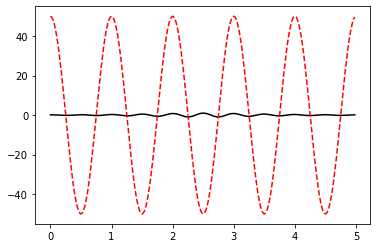

In [105]:
plt.plot(t, f(t), 'k')
plt.plot(t, 50*np.cos(2*np.pi*t), 'r--')

The first (black) graph isn't looking good.  
So, what if you want to the separate graphs?

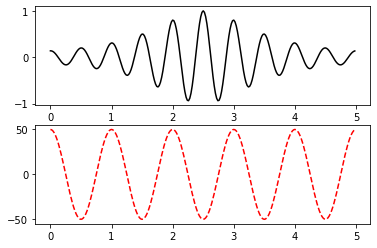

In [106]:
plt.subplot(2,1,1) # (2,1,1) implies first axes in a grid of 2x1 (2 rows, 1 col)
plt.plot(t, f(t), 'k') # plotting in first axes beacuse it is the current axes

plt.subplot(2,1,2) # (2,1,2) implies second axes in a grid of 2x1 (2 rows, 1 col)
plt.plot(t, 50*np.cos(2*np.pi*t), 'r--') # plotting in second axes because it is the current axes

subplot() helps in forming grids of similiar Axes.

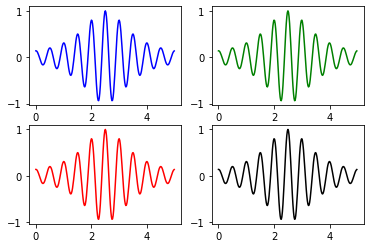

In [107]:
plt.subplot(2,2,1) # 1st element of 2x2 grid - 1st row, 1st col
plt.plot(t, f(t), 'b') # Blue graph 

plt.subplot(2,2,2) # 2nd element of 2x2 grid - 1st row, 2st col
plt.plot(t, f(t), 'g') # Green graph

plt.subplot(2,2,3) # 3rd element of 2x2 grid - 2st row, 1st col
plt.plot(t, f(t), 'r') # Red graph

plt.subplot(2,2,4) # 4th element of 2x2 grid - 2st row, 2st col
plt.plot(t, f(t), 'k') # Black graph

## Object Oriented approach to Plotting

The object-oriented API
At its core, Matplotlib is object-oriented. We recommend directly working with the objects, if you need more control and customization of your plots.

Further reading:
[matplotlib.axes.Axes](https://matplotlib.org/api/axes_api.html#matplotlib-axes) and [matplotlib.figure.Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib-figure-figure) for an overview of plotting functions.

### add_subplot() - Substitute of subplot()

Text(0, 0.5, 'some numbers')

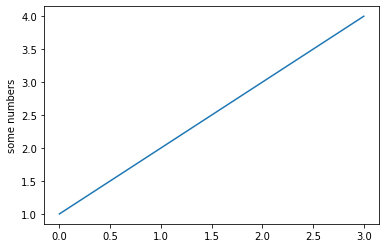

In [108]:
plt.subplot(1, 1, 1)
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')

To allow more customization, we need to move to a more object-based way to make the plots. This method involves storing various elements of the of the plots in variables (these are objects in object-oriented terminology). The above example becomes:

Text(0, 0.5, 'some numbers')

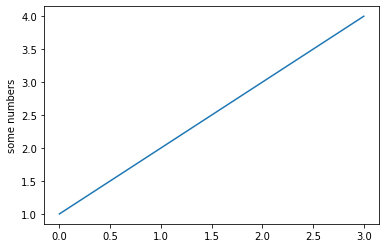

In [109]:
fig = plt.figure()  # create a figure object
ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
ax.plot([1, 2, 3, 4])
ax.set_ylabel('some numbers')

This method is more convenient for advanced plots, and we will be adopting this for the current workshop. One of the biggest advantages of using this method is that it allows users to easily handle multiple figures/axes without getting confused as to which one is currently active.

Following defines two figures, one with two sets of axes, and one with one set of axes.
Subsequently, use ax1.plot(...) to plot to the subplot in fig1, and ax2.plot(...) and ax3.plot(...) to plot in the top and bottom subplots of fig2 respectively.

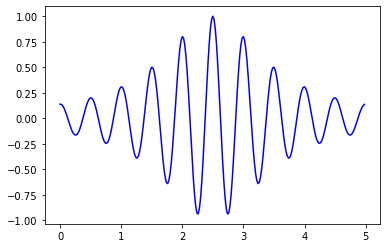

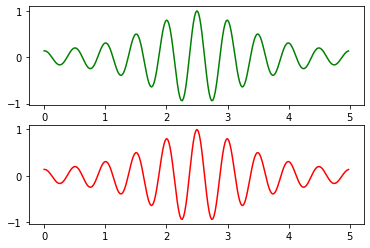

In [110]:
fig1 = plt.figure()
fig2 = plt.figure() # Defined all the figures simultaneously

ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(2, 1, 1)
ax3 = fig2.add_subplot(2, 1, 2)

ax1.plot(t, f(t), 'b') # Blue Graph
ax2.plot(t, f(t), 'g') # Green Graph
ax3.plot(t, f(t), 'r') # Red Graph

### subplots()

You can create all axes in one go.  
subplots() returns figure and multidimenionsal numpy array of Axes 

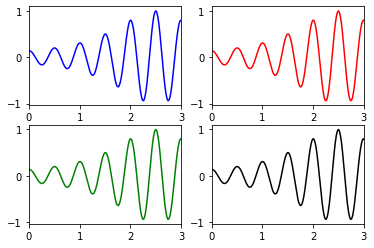

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=2)
# axes is the multidimensional numpy array of Axes.

axes[0,0].plot(t, f(t), 'b') # Blue graph
axes[1,0].plot(t, f(t), 'g') # Green graph
axes[0,1].plot(t, f(t), 'r') # Red graph
axes[1,1].plot(t, f(t), 'k') # Black graph

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    ax.set(xlim=[0, 3])

'sharex' and 'sharey' are useful parameters to subplots()

Text(0.5, 0.98, '5th')

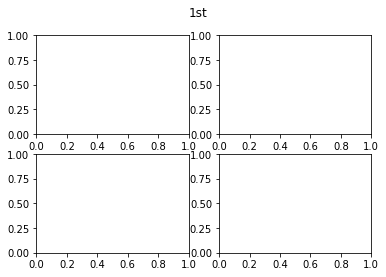

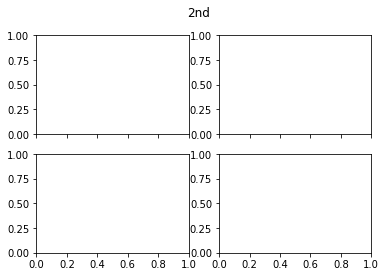

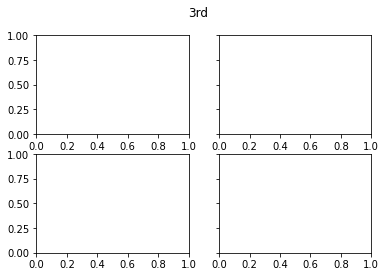

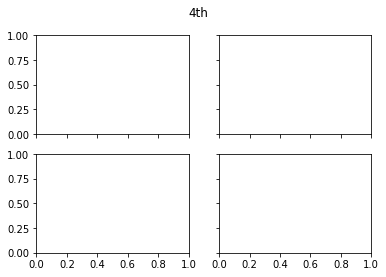

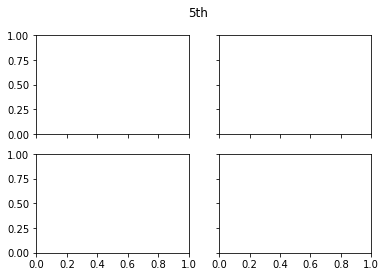

In [112]:
fig1, axes1 = plt.subplots(2, 2)

# Share a X axis with each column of subplots
fig2, axes2 = plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
fig3, axes3 = plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
fig4, axes4 = plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
fig5, axes5 = plt.subplots(2, 2, sharex=True, sharey=True)

# Setting title of figure is using suptitle()
fig1.suptitle('1st')
fig2.suptitle('2nd')
fig3.suptitle('3rd')
fig4.suptitle('4th')
fig5.suptitle('5th')

plt.subplots() is limited to mxn grids only. If you want to have different number of cells in each row, fig.add_subplot() is preferred.  
The following example shows how.

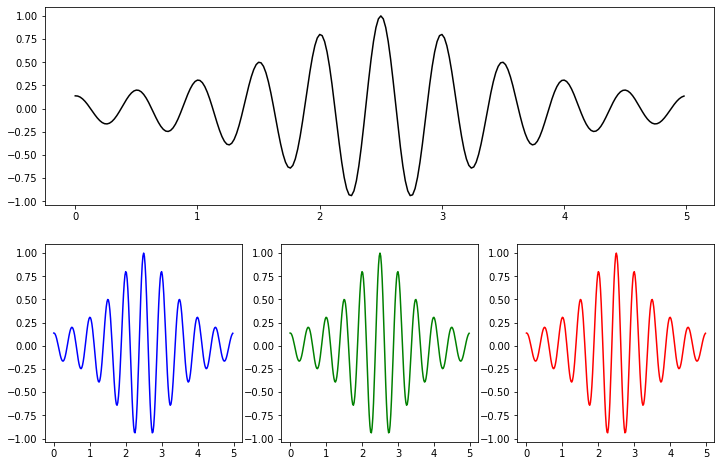

In [113]:
fig = plt.figure(figsize=(12,8)) # Try plt.figure? to know more about the parameters of creating a new figure.

ax1 = fig.add_subplot(2, 1, 1) # Equivalent to 1st element of 2x1 matrix
ax2 = fig.add_subplot(2, 3, 4) # Equivalent to 4th element of 2x3 matrix
ax3 = fig.add_subplot(2, 3, 5) # Equivalent to 5th element of 2x3 matrix
ax4 = fig.add_subplot(2, 3, 6) # Equivalent to 6th element of 2x3 matrix

ax1.plot(t, f(t), 'k') # Black graph 
ax2.plot(t, f(t), 'b') # Blue graph 
ax3.plot(t, f(t), 'g') # Green graph 
ax4.plot(t, f(t), 'r') # Red graph

If you want to exchange the left and right graphs. All you need to do is change the axes they are plotted.  
If you wish to change to the size, shape and position of graphs, you only need to change the add_subplot() parameters.

### Twin Axes

It is considered useful to have dual x or y axes in a figure. Moreso, when plotting curves with different units together.  
Matplotlib supports this with the twinx() and twiny() functions.

Text(0.5, 0, 'Time (s)')

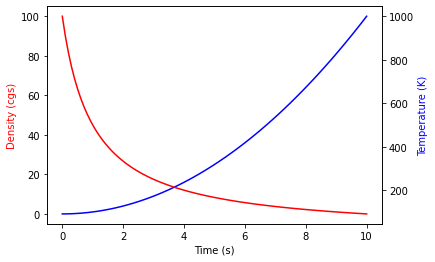

In [114]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
# fig.add_subplot(111) gives same result as long as all the three are single digit integer

ax2 = ax1.twinx()

ts = np.linspace(0., 10., 100)
ax1.plot(ts, ts ** 2, 'b-')
ax2.plot(ts, 1000 / (ts + 1), 'r-')

# set_ylabel sets the properties of y-axis label, set_xlabel sets the properties of x-axis label
ax1.set_ylabel('Density (cgs)', color='red')
ax2.set_ylabel('Temperature (K)', color='blue')
ax1.set_xlabel('Time (s)')

### Gridspec

add_subplot() is a powerful tool but you can't make an element which covers 2/3rd of a row.  
For that add_subplot() is used in association with gridspec.

Text(0.5, 1.0, 'gs[1, -2]')

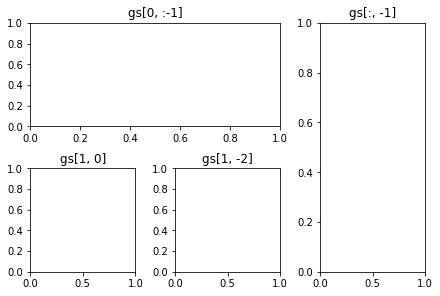

In [115]:
fig = plt.figure(constrained_layout=True)
# Remove the constrained_layout part and see the difference.

gs = fig.add_gridspec(2, 3) # Creates 6 elements in form of 2x3 grid

# Merges 1st element(0,0), 2nd element(0,1)
ax2 = fig.add_subplot(gs[0, :-1])
# [0, :-1] implies 1st row and all columns before last (Recall slicing of list)
ax2.set_title('gs[0, :-1]')

# Merges 3rd element(0,2), 6th element(1,2)
ax3 = fig.add_subplot(gs[:, -1])
ax3.set_title('gs[:, -1]')

# Only 4th element(1,0)
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('gs[1, 0]')

# Only 5th element(1,1)
ax5 = fig.add_subplot(gs[1, -2])
ax5.set_title('gs[1, -2]')

Another advantage of gridspec is that you can set ratio of width and height.

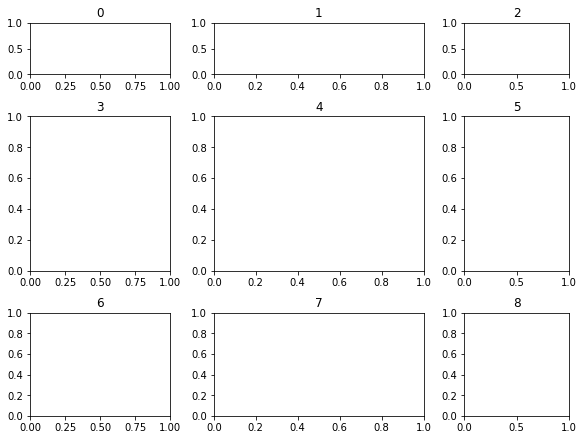

In [116]:
fig = plt.figure(figsize=(8,6), constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig.add_subplot(spec[row, col])
        ax.set(title=str(row*3+col))

### add_axes()

We see that gridspec is very useful but what if our Axes pattern isn't grid like (like inset)  
fig.add_axes() comes to rescue.  
It takes a list of four elements as the parameter [x, y, width, height] where (x,y) is w.r.t the bottom left corner of the figure.

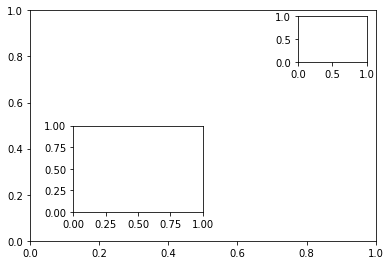

In [117]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax2 = fig.add_axes([0.72, 0.72, 0.16, 0.16])
ax3 = fig.add_axes([0.2,0.2,.3,.3])